# Dataset Found

**Link :** https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

## Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
from keras.models import model_from_json

# Data Preprocessing

## Preprocessing the Training set

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_inputs = train_datagen.flow_from_directory('Dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [3]:
train_inputs.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

## Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_inputs = test_datagen.flow_from_directory('Dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [5]:
test_inputs.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

# Convolutional Neural Network

## Building the CNN

### Initialising the CNN

In [6]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [10]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [12]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Training the CNN model

## Compiling the CNN

In [13]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the CNN on the Training set and evaluating it on the Test set

In [14]:
cnn.fit(x = train_inputs, validation_data = test_inputs, epochs = 25)

Epoch 1/25
163/163 [==============================] - 316s 2s/step - loss: 0.3856 - accuracy: 0.8290 - val_loss: 0.5441 - val_accuracy: 0.7548
Epoch 2/25
163/163 [==============================] - 159s 971ms/step - loss: 0.2419 - accuracy: 0.8997 - val_loss: 0.3238 - val_accuracy: 0.8734
Epoch 3/25
163/163 [==============================] - 157s 963ms/step - loss: 0.2162 - accuracy: 0.9099 - val_loss: 0.4486 - val_accuracy: 0.8494
Epoch 4/25
163/163 [==============================] - 156s 959ms/step - loss: 0.1837 - accuracy: 0.9294 - val_loss: 0.3347 - val_accuracy: 0.8702
Epoch 5/25
163/163 [==============================] - 157s 963ms/step - loss: 0.1813 - accuracy: 0.9323 - val_loss: 0.4781 - val_accuracy: 0.8397
Epoch 6/25
163/163 [==============================] - 157s 964ms/step - loss: 0.1647 - accuracy: 0.9375 - val_loss: 0.5006 - val_accuracy: 0.8205
Epoch 7/25
163/163 [==============================] - 325s 2s/step - loss: 0.1452 - accuracy: 0.9431 - val_loss: 0.2982 - val_a

# summary() method will display the architecture of the model

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

# Save model and Load

## Saved model to disk

In [16]:
# serialize model to JSON
model_json = cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [17]:
# Serialize weights to HDF5
cnn.save_weights("mymodel.h5")
print("Saved model to disk")

Saved model to disk


## Loaded model from disk

In [18]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

In [19]:
# load weights into new model
model.load_weights("mymodel.h5")
print("Loaded model from disk")

Loaded model from disk


# Making a single prediction

1.0
{'NORMAL': 0, 'PNEUMONIA': 1}


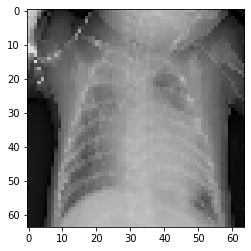

In [20]:
test_image1 = image.load_img('Dataset/single_prediction/Virus1.jpeg', target_size = (64, 64))

image_data1 = image.img_to_array(test_image1)
exp_img1 = np.expand_dims(image_data1, axis = 0)

plt.imshow(test_image1)

result = model.predict(exp_img1)
print(result[0][0])
print( train_inputs.class_indices)

if result[0][0] == 0:
    prediction = '0 : NORMAL'
else:
    prediction = '1 : PNEUMONIA'

In [21]:
print(prediction)

1 : PNEUMONIA


0.0
{'NORMAL': 0, 'PNEUMONIA': 1}


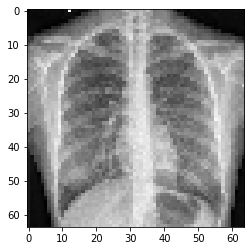

In [22]:
test_image2 = image.load_img('Dataset/single_prediction/Normal1.jpeg', target_size = (64, 64))

image_data2 = image.img_to_array(test_image2)
exp_img2 = np.expand_dims(image_data2, axis = 0)

plt.imshow(test_image2)

result = model.predict(exp_img2)
print(result[0][0])
print( train_inputs.class_indices)

if result[0][0] == 0:
    prediction = '0 : NORMAL'
else:
    prediction = '1 : PNEUMONIA'

In [23]:
print(prediction)

0 : NORMAL


0.0
{'NORMAL': 0, 'PNEUMONIA': 1}


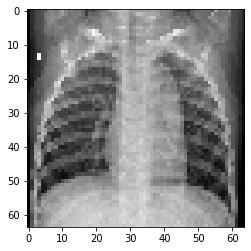

In [24]:
test_image3 = image.load_img('Dataset/single_prediction/Normal2.jpeg', target_size = (64, 64))

image_data3 = image.img_to_array(test_image3)
exp_img3 = np.expand_dims(image_data3, axis = 0)

plt.imshow(test_image3)

result = model.predict(exp_img3)
print(result[0][0])
print( train_inputs.class_indices)

if result[0][0] == 0:
    prediction = '0 : NORMAL'
else:
    prediction = '1 : PNEUMONIA'

In [25]:
print(prediction)

0 : NORMAL


1.0
{'NORMAL': 0, 'PNEUMONIA': 1}


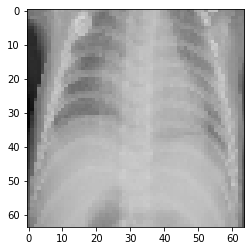

In [26]:
test_image4 = image.load_img('Dataset/single_prediction/Virus2.jpeg', target_size = (64, 64))

image_data4 = image.img_to_array(test_image4)
exp_img4 = np.expand_dims(image_data4, axis = 0)

plt.imshow(test_image4)

result = model.predict(exp_img4)
print(result[0][0])
print( train_inputs.class_indices)

if result[0][0] == 0:
    prediction = '0 : NORMAL'
else:
    prediction = '1 : PNEUMONIA'

In [27]:
print(prediction)

1 : PNEUMONIA


**Accuracy = 96%**

### Reference

**For Lung Disease**

Link : https://medlineplus.gov/ency/article/000066.htm